# **Final Project 1 - Linear Regression**

Nama        : Firza Ananda Bramuda <br>
KMI Batch   : 5 <br>


### A.1. Introduction
----

#### 1.1. Latar Belakang 

Uber dan Lyft merupakan jasa layanan transportasi online yang dapat dipesan melalui smartphone. Selain menawarkan jasa layanan tarnsportasi, Uber dan Lyft juga menawarkan layanan pengiriman makanan dengan pembayaran melalui aplikasi yang telah mereka miliki. 

__Lyft__ Inc. (LYFT) diluncurkan sebagai layanan pada tahun 2012. Layanan ini lahir dari Zimride, perusahaan yang didirikan oleh Logan Green dan John Zimmer. Lyft beroperasi di Amerika Serikat dan Kanada. 

__Uber__ didirikan pada 2009 oleh Travis Kalanick dan Garrett Camp sebagai UberCab. Uber tidak hanya melayani di Amerika Serikat dan Kanada, tetapi juga menyediakan layanan di banyak kota di seluruh dunia, termasuk di Uni Eropa, Amerika Tengah dan Selatan, Afrika, Asia, Australia, dan Selandia Baru.

Selain cakupan wilayah ada beberapa perbedaan yang dibimilik Uber dan Lyft :
- Harga : Harga yang ditawarkan Lyft pada layanan transportasi lebih rendah daripada Uber.
- Aplikasi : Fitur yang dimiliki Uber lebih bagus dan inovatif.
- Jenis Kendaraan : Jenis Kendaraan yang ditawarkan oleh Uber leboh banyak daripada Lyft.
- Layanan Pelanggan: Layanan Pelanggan yang diberikan oleh lyft lebih baik dan ramah daripada Uber yang cenderung profesional.

Dalam pemodelan Linear Regression, kita dapat menggunakan seperti wilayah cakupan, jarak, waktu, harga dan variabel lainnya yang telah dikumpulkan pada suatu dataset untuk dilakukan. Dengan membandingkan data dari Uber dan Lyft kita dapat membuat suatu prediksi harga untuk dapat membandingkan antara harga prediksi dan harga asli dan memperoleh akurasi yang sesuai.

#### 1.2 Dataset
Dataset yang digunakan untuk pemodelan ini diperoleh open source yang didapatkan dari kaggle. Dataset ini bernama __Uber and Lyft Dataset Boston, MA__. Dataset ini berisi 693.071 baris dan 57 kolom.  Atribut yang menjadi target yaitu atribut Price atau harga, sedangkan atribut lainnya merupakan prediktor.

#### 1.3 Objektif

Objektif yang ingin dicapai dari pemodelan ini adalah: 
- Mengetahui faktor-faktor yang dapat mempengaruhi tarif harga dari kedua jasa layanan transporatsi online 
- Membuat pemodelan machine learning untuk memprediksi tarif transportasi online dengan menggunakan metode Linear Regression

### B.2. Import Library
-----

In [1]:
#Library For DataFrame
import pandas as pd
import numpy as np

#Library for Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plx
import plotly.express as px

# Library for analysis
import scipy
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import max_error,mean_absolute_error,median_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.metrics import mean_squared_error
import joblib as jb
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,ShuffleSplit
from sklearn.linear_model import Lasso

#me-non aktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')



### C.3. Data Loading
-----
Data Loading adalah proses untuk menyalin dan memuat kumpulan data dari file sumber, folder atau aplikasi ke database atau aplikasi serupa. Pada project ini, data loading dilakukan dengan cara import file csv.

In [2]:
# mengimport dan membaca data
df = pd.read_csv('rideshare_kaggle.csv')

In [3]:
# melihat data teratas
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
# melihat data terbawah
df.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [5]:
# melihat dimensi data
df.shape

(693071, 57)

In [6]:
# menghitung nilai unique
df.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dataset ini berisi 57 kolom, yaitu:

- id: nomor identifikasi unik untuk setiap perjalanan
- timestamp: cap waktu unik untuk penanda perjalanan
- hour: jam ketika perjalanan dimulai
- day: hari ketika perjalanan dimulai
- month: bulan perjalanan dimulai
datetime: waktu ketika perjalanan dimulai (dalam bentuk YYYY-MM-DD HH-MM-SS)
- timezone: zona waktu ketika perjalanan dimulai (hanya satu jenis yaitu America/New_York)
- source: lokasi awal perjalanan (titik jemput)
- destination: lokasi tujuan perjalanan
- cab_type: jenis taksi yang digunakan dalam perjalanan (Uber atau Lyft)
- product_id: kode unik untuk identifikasi layanan yang digunakan
- name: nama mobil layanan yang digunakan
- price: harga yang dibebankan dalam perjalanan
- distance: total jarak perjalanan dalam satuan mil
- surge_multiplier: rasio pengganda tarif perjalanan saat permintaan tinggi
- latitude: garis lintang lokasi awal perjalanan
- longitude: garis bujur lokasi awal perjalanan
- temperature: suhu pada lokasi awal perjalanan
- apparentTemperature: suhu yang dirasakan di lokasi awal perjalanan
- short_summary: ringkasan cuaca di lokasi awal
- long_summary: deskripsi cuaca di lokasi awal
- precipIntensity: intensitas curah hujan di lokasi awal perjalanan
- precipProbability: probabilitas curah hujan di lokasi awal perjalanan
- humidity: kelembaban di lokasi awal
- windSpeed: kecepatan angin di lokasi awal perjalanan
- windGust: kecepatan rata-rata dari lonjakan angin di lokasi awal perjalanan
- windGustTime: waktu saat lonjakan angin terjadi
- visibility: jarak pandang di lokasi awal perjalanan
- temperatureHigh: suhu tertinggi di lokasi awal
- temperatureHighTime: waktu suhu tertinggi yang terjadi di lokasi awal perjalanan
- temperatureLow: suhu terendah di lokasi awal perjalanan
- temperatureLowTime: waktu suhu terendah yang terjadi di lokasi awal perjalanan
- apparentTemperatureHigh: suhu tertinggi yang dirasakan di lokasi awal perjalanan
- apparentTemperatureHighTime: waktu suhu tertinggi yang dirasakan di lokasi awal perjalanan
- apparentTemperatureLow: suhu terendah yang dirasakan di lokasi awal perjalanan
- apparentTemperatureLowTime: waktu suhu terendah yang dirasakan di lokasi awal perjalanan
- icon: ikon cuaca di lokasi awal
- dewPoint: titik embun di lokasi
- pressure: tekanan udara dalam satuan millibar (mb)
- windBearing: arah angin dalam derajat dari utara searah jarum jam, diukur pada ketinggian 10 meter di atas permukaan tanah
- cloudCover: persentase tutupan awan
- uvIndex: indeks radiasi ultraviolet yang diproyeksikan pada tengah hari matahari
- visibility.1: jarak pandang pada satuan mil
- ozone: konsentrasi ozon
- sunriseTime: waktu matahari terbit
- sunsetTime: waktu matahari terbenam
- moonPhase: fase bulan dalam skala 0 hingga 1
- precipIntensityMax: intensitas - presipitasi maksimum dalam satuan inci per jam (in/h)
- uvIndexTime: waktu ketika uvIndex dihitung
- temperatureMin: suhu minimum pada hari itu dalam satuan Fahrenheit (°F)
- temperatureMinTime: waktu ketika suhu minimum yang dirasakan terjadi
temperatureMax: suhu maksimum pada hari itu dalam satuan Fahrenheit (°F)
- temperatureMaxTime: waktu ketika suhu maksimum yang dirasakan terjadi
apparentTemperatureMin: suhu minimum yang dirasakan pada hari itu dalam satuan Fahrenheit (°F)
- apparentTemperatureMinTime: waktu ketika suhu minimum yang dirasakan terjadi
- apparentTemperatureMax: suhu maksimum yang dirasakan pada hari itu dalam satuan Fahrenheit (°F)
- apparentTemperatureMaxTime: waktu ketika suhu maksimum yang dirasakan terjadi

### D.4. Data Cleaning
-----
Proses mempersiapkan data untuk analisis dengan menghapus atau memodifikasi data yang tidak benar, tidak lengkap, tidak relevan, diduplikasi, atau diformat dengan tidak benar.

In [8]:
# melihat data yang kosong
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [9]:
# menduplikasi data yang telah bersih
df_clear=df.dropna()

In [10]:
df_clear.shape

(637976, 57)

In [11]:
# melihat hasil data yang sudah dihapus nilai yang kosong
df_clear.isnull().sum().sum()

0

In [12]:
# melihat duplikasi data
df_clear.duplicated().sum()

0

In [13]:
# menampilkan dimensi data baru
df_clear.shape

(637976, 57)

In [14]:
# melihat kolom keseluruhan
pd.set_option("display.max.columns", None) 
df_clear.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


### E.5. Exploration Data
---

Tahap ini biasa disebut __EDA__ atau __Exploratory Data Analysis__ meruoakan adalah sebuah proses kritis dalam melakukan investigasi awal pada data dengan tujuan menemukan pola, anomali, menguji hipotesis dan dapat memeriksa asumsi dengan bantuan statistik ringkasan kemudian representasi grafis (visualisasi). 

#### 5.1 Menganalisis Data Waktu
Menganalisis jumlah jangkauan penggunaan transportasi online dalam kurun waktu sesuai dengan keberangkatan.

##### 5.1.1 Month

Menganalisis jumlah jangkauan penggunaan transportasi online dalam kurun waktu per bulan keberangkatan. 

In [15]:
# membuat variabel df_transport_name berisi total data dari kolom transport_name
df_trans_month = df_clear['month'].value_counts()
df_trans_month

month
12    374205
11    263771
Name: count, dtype: int64

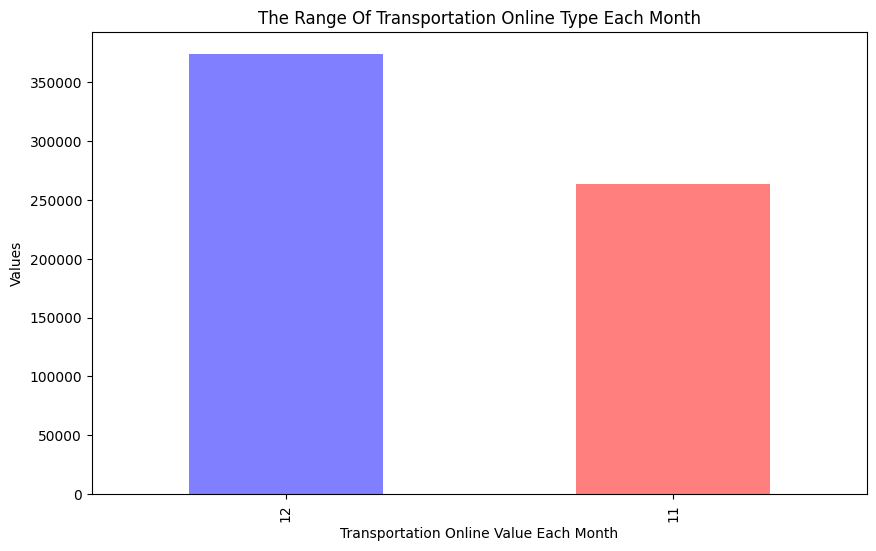

In [16]:
df_trans_month.plot(kind='bar', figsize=(10,6), color=['blue','red'], alpha=0.5)

plt.xlabel('Transportation Online Value Each Month')
plt.ylabel('Values')
plt.title('The Range Of Transportation Online Type Each Month')


# Save Plot
plt.savefig("transport_bar.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

Pada grafik diatas menunjukkan jangkauan jumlah penggunaan transportasi online pada bulan ke-11 dan ke-12. 
- Pada bulan ke-12 penggunaan transportasi online (Uber dan Lyft) mencapai angka 374205 pengguna
- Sedangkan, pada bukan ke-11 penggunaan transportasi online (Uber dan Lyft) ada pada angka 263771 pengguna
- Selisih penggunaan transportasi online pada 2 bulan tersebut kurang lebih 100000 pengguna

##### 5.1.2 Day
Menganalisis jumlah jangkauan penggunaan transportasi online dalam kurun waktu per hari keberangkatan.

In [17]:
# melihat jumlah data setiap hari dari penggunaan online transportation
df_trans_day = df_clear.groupby("day")[["cab_type"]].value_counts().sort_values()
df_trans_day

day  cab_type
9    Lyft          668
     Uber          861
10   Lyft         1212
     Uber         1322
4    Lyft         5704
     Uber         5923
26   Lyft        14000
     Uber        15028
18   Lyft        15958
13   Lyft        17005
18   Uber        17371
13   Uber        18491
17   Lyft        19685
2    Lyft        19845
15   Lyft        19906
30   Lyft        19913
3    Lyft        20021
16   Lyft        20039
14   Lyft        20151
1    Lyft        20289
14   Uber        21193
3    Uber        21302
16   Uber        21320
1    Uber        21391
15   Uber        21426
2    Uber        21453
30   Uber        21631
17   Uber        21669
29   Lyft        26466
     Uber        28756
28   Lyft        32791
27   Lyft        33755
28   Uber        35051
27   Uber        36380
Name: count, dtype: int64

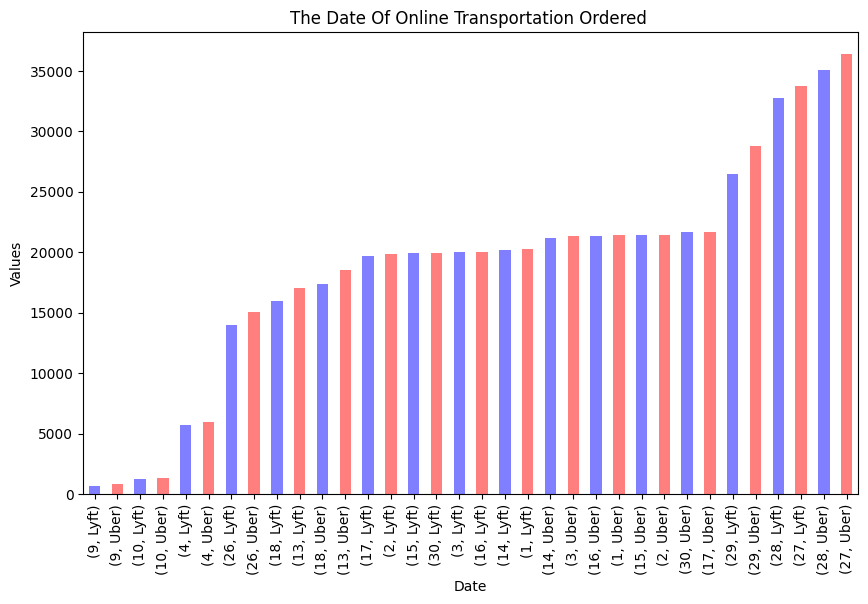

In [18]:
df_trans_day.plot(kind='bar', figsize=(10,6), color=['blue','red'], alpha=0.5)

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('The Date Of Online Transportation Ordered ')

# Save Plot
plt.savefig("transport_bar.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

Pada grafik diatas menunjukkan penggunaan harian transportasi online (uber dan Lyft).
- Jumlah penggunaan tertinggi Uber ada di angka 36380 pada tanggal 27 dan penggunaan tertinggi Lyft ada di angka 33755 pada tanggan 27. Diperoleh selisih pengguna dari kedua trasportasi tersebut sekitar 2000 pengguna.
- Sedangkan penggunaan terendah Uber ada di angka 861 pada tanggal 9 dan penggunaan terendah Lyft ada di angka 668 pada tanggal 29. Diperoleh selisih pengguna dari kedua trasportasi tersebut sekitar 150 pengguna.

##### 5.1.3 Hour
Menganalisis jumlah jangkauan penggunaan transportasi online dalam kurun waktu per jam keberangkatan.

In [19]:
# melihat data pesanan per jam
df_trans_hour = df_clear.groupby("hour")[["cab_type"]].value_counts().sort_values()
df_trans_hour

hour  cab_type
8     Lyft        10700
7     Lyft        11024
5     Lyft        11155
8     Uber        11637
20    Lyft        11715
5     Uber        11840
7     Uber        11906
6     Lyft        11935
3     Lyft        12224
19    Lyft        12461
21    Lyft        12480
4     Lyft        12502
2     Lyft        12548
1     Lyft        12669
20    Uber        12905
9     Lyft        12948
19    Uber        12949
21    Uber        13069
6     Uber        13212
22    Lyft        13247
3     Uber        13306
14    Lyft        13306
10    Lyft        13325
16    Lyft        13349
11    Lyft        13372
15    Lyft        13394
18    Lyft        13404
13    Lyft        13503
4     Uber        13623
12    Lyft        13633
1     Uber        13641
9     Uber        13725
2     Uber        13775
22    Uber        13846
17    Lyft        13853
23    Lyft        14004
17    Uber        14222
12    Uber        14384
15    Uber        14474
13    Uber        14474
18    Uber        14554
1

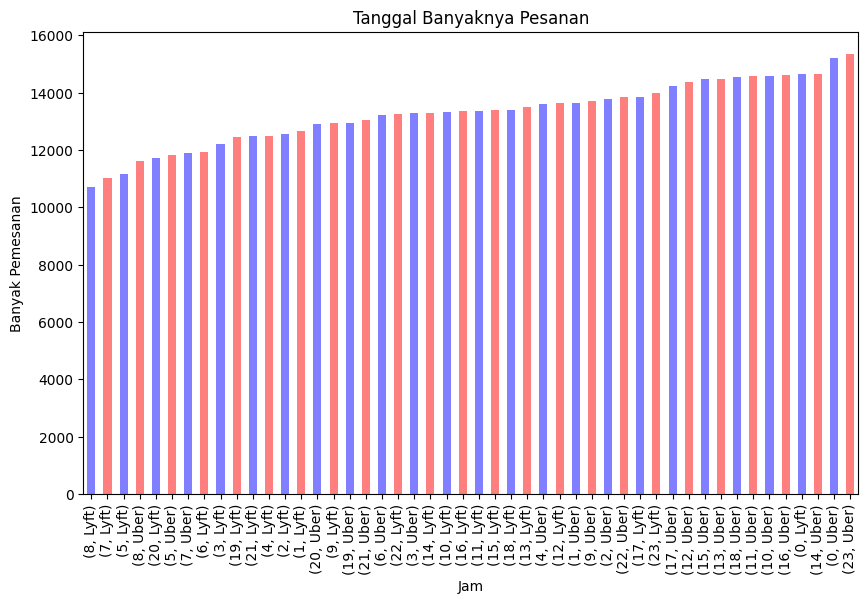

In [20]:
df_trans_hour.plot(kind='bar', figsize=(10,6), color=['blue','red'], alpha=0.5)

plt.xlabel('Jam')
plt.ylabel('Banyak Pemesanan')
plt.title('Tanggal Banyaknya Pesanan')


# Save Plot
plt.savefig("transport_bar.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

Pada grafik diatas menunjukan jumlah penggunaan transoportasi online (Uber dan Lyft) sesuai dengan jam keberangkatan.
- Uber memiliki jumlah penggunaan tertinggi pada jam keberangkatan 23.00 dengan total  15351 pengguna, dan terendah pada jam keberangkatan 08.00 dengan total 11637 pengguna.
- Lyft jumlah penggunaan tertinggipada jam keberangkatan 00.00 dengan total 14657 pengguna dan terendah pada jam keberangkatan 08.00 dengan total 10700 pengguna.

#### 5.2 Source and Destination

##### 5.2.1 Source

In [21]:
# melihat data pesanan dimulai perjalanan
df_trans_source = df_clear['source'].value_counts().sort_values()
df_trans_source

source
North Station              52576
Beacon Hill                52841
West End                   52980
Haymarket Square           53147
South Station              53160
Northeastern University    53164
Fenway                     53166
North End                  53171
Boston University          53172
Back Bay                   53201
Theatre District           53201
Financial District         54197
Name: count, dtype: int64

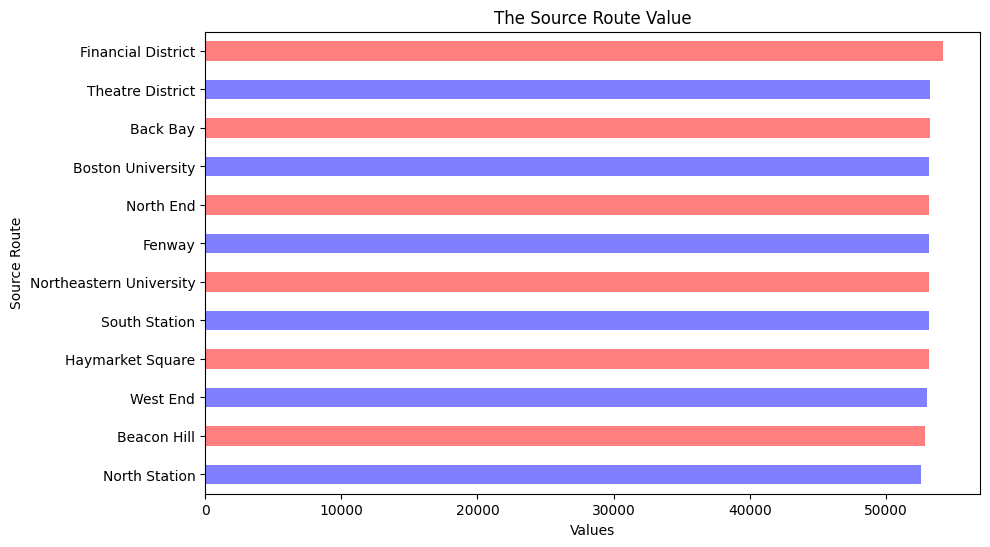

In [22]:
df_trans_source.plot(kind='barh', figsize=(10,6), color=['blue','red'], alpha=0.5)

plt.xlabel('Values')
plt.ylabel('Source Route')
plt.title('The Source Route Value')

# Save Plot
plt.savefig("transport_bar.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

##### 5.2.2 Destination

In [23]:
# melihat data pesanan selesai perjalanan
df_trans_destination = df_clear['destination'].value_counts().sort_values()
df_trans_destination

destination
North Station              52577
Beacon Hill                52840
West End                   52992
South Station              53159
North End                  53164
Northeastern University    53165
Fenway                     53166
Haymarket Square           53171
Boston University          53171
Theatre District           53189
Back Bay                   53190
Financial District         54192
Name: count, dtype: int64

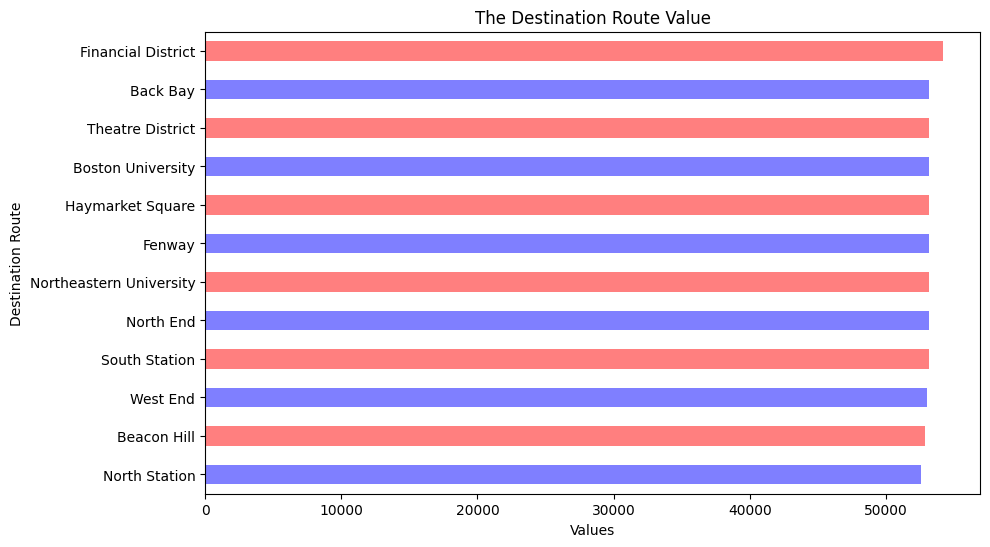

In [24]:
df_trans_destination.plot(kind='barh', figsize=(10,6), color=['blue','red'], alpha=0.5)

plt.xlabel('Values')
plt.ylabel('Destination Route')
plt.title('The Destination Route Value')


# Save Plot
plt.savefig("transport_bar.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

#### 5.3 Cab Type

##### 5.3.1 Cab Type Value

In [25]:
# melihat data tipe mobil
df_trans_cabtyp= df_clear['cab_type'].value_counts().sort_values()
df_trans_cabtyp

cab_type
Lyft    307408
Uber    330568
Name: count, dtype: int64

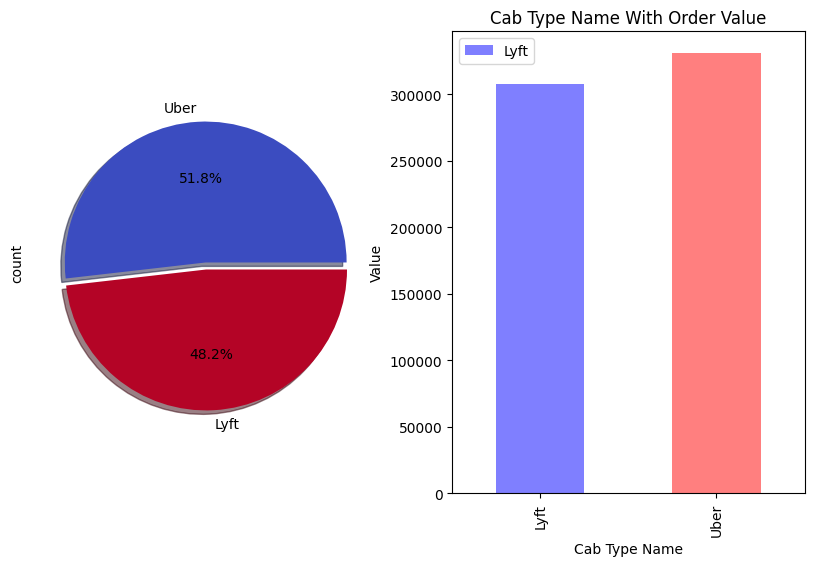

In [26]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
df_clear['cab_type'].value_counts().plot(
    kind='pie', 
    ax=ax[0], 
    autopct='%.1f%%',
    explode=[0,0.05], 
    cmap='coolwarm',
    shadow=True,
)    
df_trans_cabtyp.plot(kind='bar', figsize=(10,6), color=['blue','red'], alpha=0.5)

plt.xlabel('Cab Type Name')
plt.ylabel('Value')
plt.title('Cab Type Name With Order Value')
plt.legend(labels=df_trans_cabtyp.index)

# Save Plot
plt.savefig("transport_bar.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

##### 5.3.2 Cab Type With Day Value 

In [27]:
df_day_cab =df_clear.groupby(by=["day","cab_type"]).size().reset_index(name="counts").set_index("cab_type")
df_day_cab

,day,counts
cab_type,,
Lyft,1,20289
Uber,1,21391
Lyft,2,19845
Uber,2,21453
Lyft,3,20021
Uber,3,21302
Lyft,4,5704
Uber,4,5923
Lyft,9,668


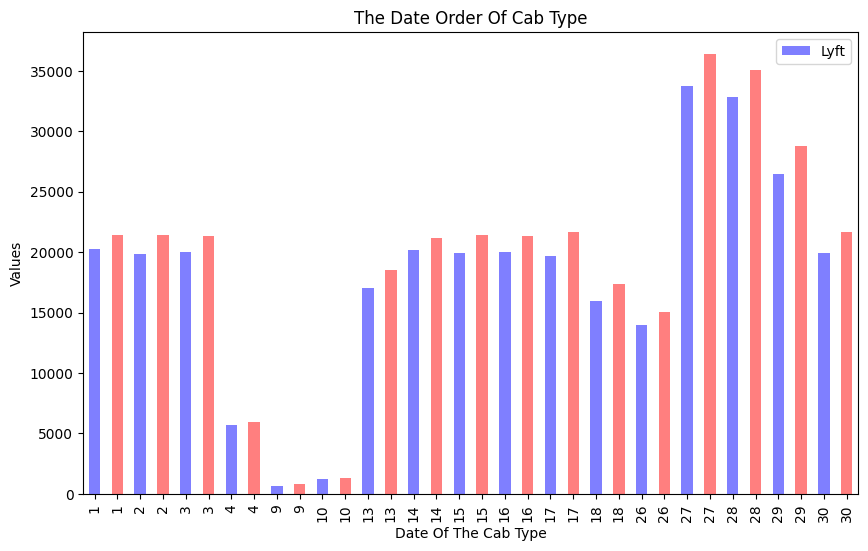

In [28]:
df_day_cab.plot(kind='bar', x="day", y="counts", figsize=(10,6), color=['blue','red'], alpha=0.5)

plt.xlabel('Date Of The Cab Type')
plt.ylabel('Values')
plt.title('The Date Order Of Cab Type')
plt.legend(labels=df_day_cab.index)
df_day_cab

# Save Plot
plt.savefig("transport_bar.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')
# kasih legend untuk cab_type

plt.show()

In [29]:
df_hour_cab =df_clear.groupby(by=["hour","cab_type"]).size().reset_index(name="counts").set_index("cab_type")
df_hour_cab

,hour,counts
cab_type,,
Lyft,0,14657
Uber,0,15215
Lyft,1,12669
Uber,1,13641
Lyft,2,12548
Uber,2,13775
Lyft,3,12224
Uber,3,13306
Lyft,4,12502


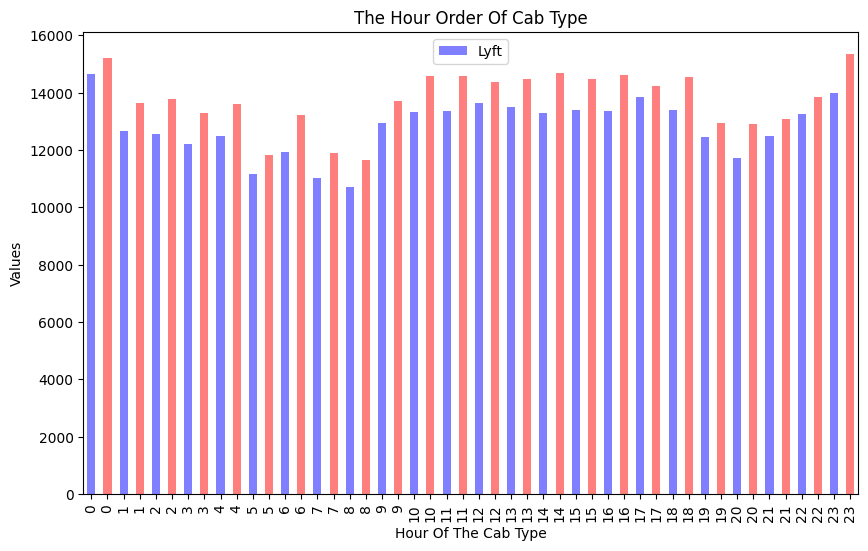

In [30]:
df_hour_cab.plot(kind='bar', x="hour", y="counts", figsize=(10,6), color=['blue','red'], alpha=0.5)

plt.xlabel('Hour Of The Cab Type')
plt.ylabel('Values')
plt.title('The Hour Order Of Cab Type')
plt.legend(labels=df_hour_cab.index)
df_hour_cab

# Save Plot
plt.savefig("transport_bar.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')
# kasih legend untuk cab_type

plt.show()

#### 5.4 Map untuk melihat maximum price

In [31]:
df_clear.groupby(by=["destination","source"]).agg({'latitude':'mean','longitude':'mean'})

latitude  longitude
destination source                                       
Back Bay    Boston University        42.336960 -71.066178
            Fenway                   42.337740 -71.065822
            Haymarket Square         42.337087 -71.065110
            North End                42.338100 -71.066343
            Northeastern University  42.336668 -71.065314
...                                        ...        ...
West End    Fenway                   42.338291 -71.066356
            Haymarket Square         42.339314 -71.066239
            North End                42.337212 -71.066268
            Northeastern University  42.340015 -71.066646
            South Station            42.338983 -71.066967

[72 rows x 2 columns]

In [32]:
! pip install geopandas

In [33]:
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster
map_1 = df_clear[df_clear['source']=='Haymarket Square']
df_map = folium.Map(location=[map_1["latitude"].mean(), map_1["longitude"].mean()],zoom_start = 10)
df_map.add_child(FastMarkerCluster(map_1[['latitude', 'longitude']].values.tolist(),color='green'))
df_map

In [34]:
print('Minimum price in our data :',df_clear.price.min())

Minimum price in our data : 2.5


In [35]:
min_price=df_clear[df_clear['price']==df_clear.price.min()]
min_price

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
5901,f6ed86e6-c3f1-42f5-9ce9-bb4bea19f18e,1.543448e+09,23,28,11,2018-11-28 23:33:41,America/New_York,Boston University,Back Bay,Lyft,lyft_line,Shared,2.5,1.53,1.0,42.2148,-71.0330,39.35,33.00,Overcast,Mostly cloudy throughout the day.,0.0000,0.00,0.69,9.63,14.39,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,cloudy,29.86,995.30,293,1.00,0,10.000,355.0,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
7370,5c77b1f4-dbd3-4533-8ba9-ddc4af2ad740,1.545134e+09,11,18,12,2018-12-18 11:45:10,America/New_York,Haymarket Square,Beacon Hill,Lyft,lyft_line,Shared,2.5,1.39,1.0,42.3661,-71.0631,24.71,12.26,Mostly Cloudy,Mostly cloudy throughout the day.,0.0000,0.00,0.51,15.00,24.98,1545127200,9.901,32.81,1545159600,20.92,1545220800,22.75,1545159600,14.29,1545199200,partly-cloudy-night,9.22,1006.60,315,0.77,0,9.901,369.6,1545134997,1545167680,0.37,0.0028,1545152400,23.09,1545192000,38.03,1545109200,11.82,1545134400,31.92,1545109200
8623,9da5d7c6-cbf6-4dc9-a69f-3c57893ade01,1.543440e+09,21,28,11,2018-11-28 21:20:10,America/New_York,South Station,Financial District,Lyft,lyft_line,Shared,2.5,0.65,1.0,42.3519,-71.0551,41.35,35.62,Overcast,Mostly cloudy throughout the day.,0.0000,0.00,0.60,9.29,11.60,1543431600,10.000,42.60,1543438800,37.33,1543489200,36.56,1543435200,31.82,1543478400,cloudy,28.39,993.87,295,1.00,0,10.000,355.2,1543405934,1543439719,0.72,0.0000,1543420800,33.70,1543399200,42.60,1543438800,29.88,1543399200,36.56,1543435200
16675,1ad71e9a-d990-49be-8b77-6e94fb40f260,1.543299e+09,6,27,11,2018-11-27 06:06:21,America/New_York,Fenway,Back Bay,Lyft,lyft_line,Shared,2.5,1.47,1.0,42.2148,-71.0330,43.03,36.79,Light Rain,Light rain in the morning.,0.0674,1.00,0.93,11.62,12.67,1543334400,2.642,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,rain,41.15,996.34,65,1.00,0,2.642,286.9,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
17032,93192aa7-f773-4127-9a02-ab52d061d26a,1.543459e+09,2,29,11,2018-11-29 02:29:08,America/New_York,North End,North Station,Lyft,lyft_line,Shared,2.5,0.98,1.0,42.3429,-71.1003,37.92,31.91,Mostly Cloudy,Mostly cloudy throughout the day.,0.0000,0.00,0.71,8.28,12.43,1543431600,9.981,42.70,1543438800,37.17,1543464000,36.77,1543438800,31.87,1543460400,partly-cloudy-night,29.42,997.37,305,0.75,0,9.981,348.9,1543405943,1543439731,0.72,0.0000,1543420800,33.60,1543399200,42.70,1543438800,30.08,1543399200,36.77,1543438800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677015,7ed35758-7e46-4602-a0fe-d46276142fab,1.545115e+09,6,18,12,2018-12-18 06:40:13,America/New_York,Haymarket Square,Financial District,Lyft,lyft_line,Shared,2.5,0.99,1.0,42.3503,-71.0810,33.71,25.35,Overcast,Mostly cloudy throughout the day.,0.0017,0.11,0.65,11.05,20.20,1545127200,5.860,32.75,1545159600,20.66,1545220800,22.75,1545159600,14.53,1545199200,cloudy,23.09,1001.28,314,1.00,0,5.860,362.1,1545134998,1545167687,0.37,0.0028,1545152400,23.23,15

In [36]:
print('Maximum price in our data :',df_clear.price.max())

Maximum price in our data : 97.5


In [37]:
max_price=df_clear[df_clear['price']==df_clear.price.max()]
max_price

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
597071,ba1593a1-e4fd-4c7a-a011-e2d4fccbf081,1.543714e+09,1,2,12,2018-12-02 01:28:02,America/New_York,Financial District,Fenway,Lyft,lyft_luxsuv,Lux Black XL,97.5,4.43,2.0,42.3503,-71.081,35.52,35.52,Clear,Light rain in the morning and overnight.,0.0,0.0,0.82,1.85,2.37,1543672800,9.846,44.65,1543690800,34.88,1543712400,43.98,1543690800,35.53,1543712400,clear-night,30.46,1023.52,146,0.12,0,9.846,274.6,1543665335,1543698860,0.82,0.0,1543683600,31.57,1543665600,44.65,1543690800,28.1,1543658400,43.98,1543690800


In [38]:
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster
map_max = df_clear[df_clear['source']=='Financial District']
df_map_max = folium.Map(location=[map_1["latitude"].mean(), map_1["longitude"].mean()],zoom_start = 10)
df_map_max.add_child(FastMarkerCluster(map_max[['latitude', 'longitude']].values.tolist(),color='green'))
df_map_max

### F.6. Data Prepocessing
-----
Proses mengubah data mentah ke dalam bentuk yang lebih mudah dipahami. Proses ini diperlukan untuk memperbaiki kesalahan pada data mentah yang seringkali tidak lengkap dan memiliki format yang tidak teratur.

#### 6.1.1 Melihat Korelasi Antar Kolom

##### 6.1.1.1 Melihat Hubungan dengan Temperature

In [39]:
temp_data= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']

In [40]:
df_temperature = df_clear[temp_data]
df_temperature.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75,9.0


<Axes: >

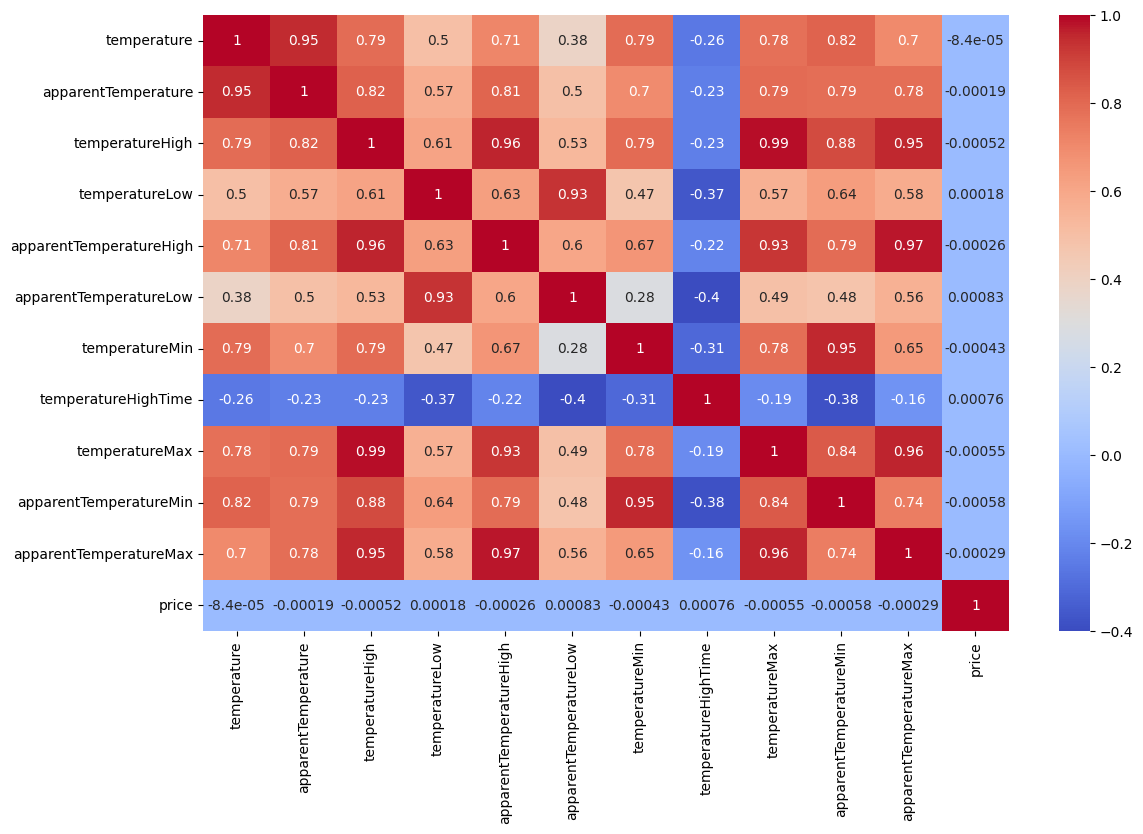

In [41]:
plt.figure(figsize=(13,8))
sns.heatmap(df_temperature.corr(),cmap='coolwarm' ,annot=True)

* Hasil sementara:
  
  Terlihat bahwa pada data yang berhubungan dnegan temperature rendah korelasinya

##### 6.1.1.2 Kolom yang berhubungan dengan climate

In [42]:
climate_data = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']

In [43]:
df_climate = df_clear[climate_data]
df_climate.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,7.0
3,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,26.0
4,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,9.0


<Axes: >

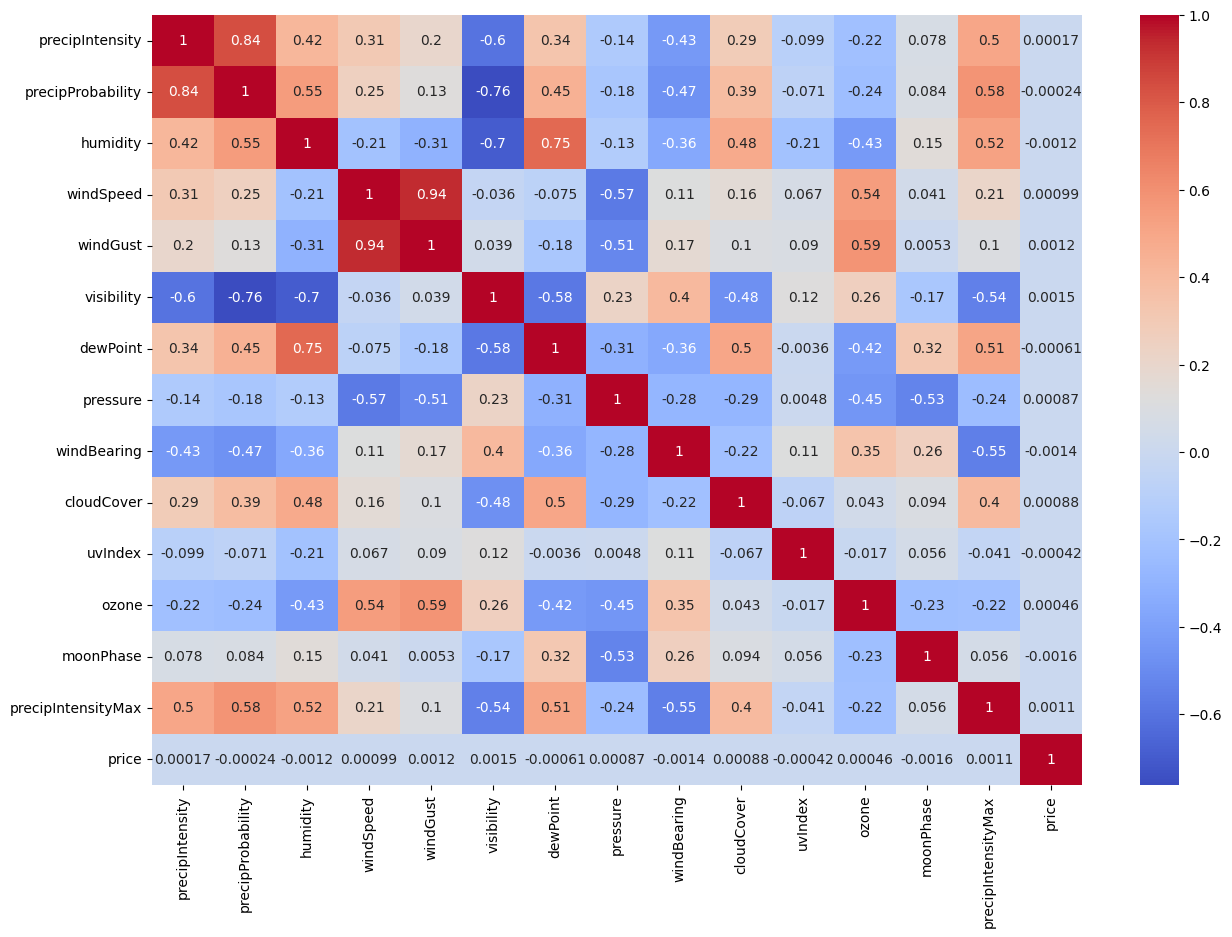

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(df_climate.corr(),cmap='coolwarm' ,annot=True)

* Hasil sementara:
  
  Terlihat bahwa pada data yang berhubungan dnegan climate data rendah korelasinya

#### 6.2.2 Menghapus kolom yang memiliki korelasi rendah

In [45]:
df_clear_new = df_clear.drop(['id','timestamp','latitude','longitude','datetime','temperature','apparentTemperature','temperatureHigh','temperatureHighTime','temperatureLow','apparentTemperatureHigh',
                              'apparentTemperatureLow','temperatureMin','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime','precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)
df_clear_new.shape

(637976, 16)

In [46]:
df_clear_new.head()

,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,short_summary,long_summary,icon,visibility.1
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night,10.000
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,Rain,"Rain until morning, starting again in the eve...",rain,4.786
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,Clear,Light rain in the morning.,clear-night,10.000
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,Clear,Partly cloudy throughout the day.,clear-night,10.000
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night,10.000


##### 6.2.2.1 Menghapus data unique

In [47]:
cat_col = df_clear_new.select_dtypes(include=['object','category']).columns.tolist()
for column in df_clear_new[cat_col]:
    print(f'{column} : {df_clear_new[column].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Clou

* Hasil Sementara:
  Dalam data unique yang muncul terlihat bahwa data timezone hanya terdapat di Amerika/New York dan product_id banyak memliki seri angka berbeda, sehingga dapat diminimalisir untuk dihapus

In [48]:
df_clear_new2 = df_clear_new.drop(['timezone','product_id'], axis=1)

In [49]:
# melihat kolom keseluruhan
pd.set_option("display.max.columns", None) 
df_clear_new2.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,long_summary,icon,visibility.1
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night,10.000
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,"Rain until morning, starting again in the eve...",rain,4.786
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,Light rain in the morning.,clear-night,10.000
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,Partly cloudy throughout the day.,clear-night,10.000
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night,10.000


##### 6.2.2.2 Melihat kolom object 

In [50]:
df_clear_new2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              637976 non-null  int64  
 1   day               637976 non-null  int64  
 2   month             637976 non-null  int64  
 3   source            637976 non-null  object 
 4   destination       637976 non-null  object 
 5   cab_type          637976 non-null  object 
 6   name              637976 non-null  object 
 7   price             637976 non-null  float64
 8   distance          637976 non-null  float64
 9   surge_multiplier  637976 non-null  float64
 10  short_summary     637976 non-null  object 
 11  long_summary      637976 non-null  object 
 12  icon              637976 non-null  object 
 13  visibility.1      637976 non-null  float64
dtypes: float64(4), int64(3), object(7)
memory usage: 73.0+ MB


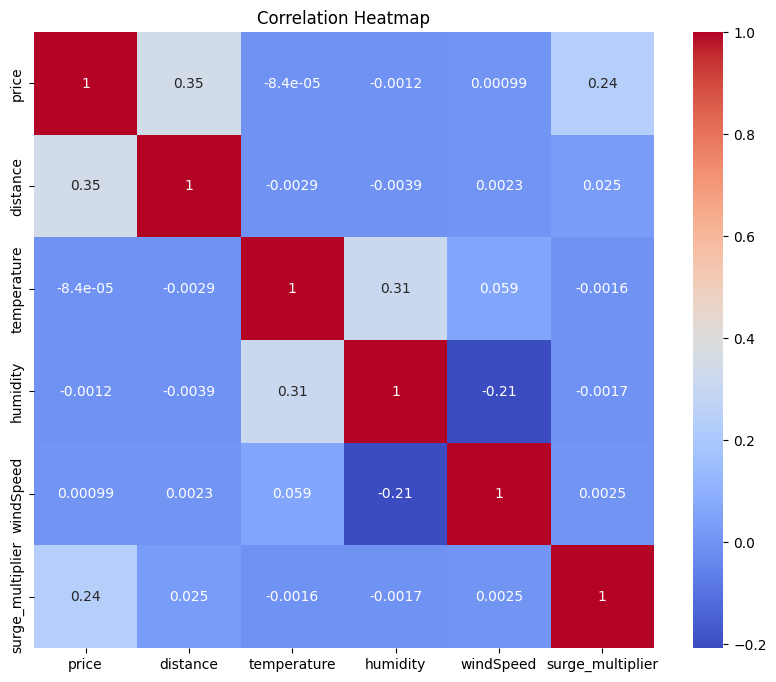

In [51]:
numerical_cols = ['price', 'distance', 'temperature', 'humidity', 'windSpeed','surge_multiplier']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Berikut adalah Korelasi dari berbagai kolom numerik yang telah saya pilih, namun kebanyakan berkorelasi lemah, jika kita asumsikan bahwa price yang ingin kita deteksi, maka semua korelasi yang telah dipilih masih lemah

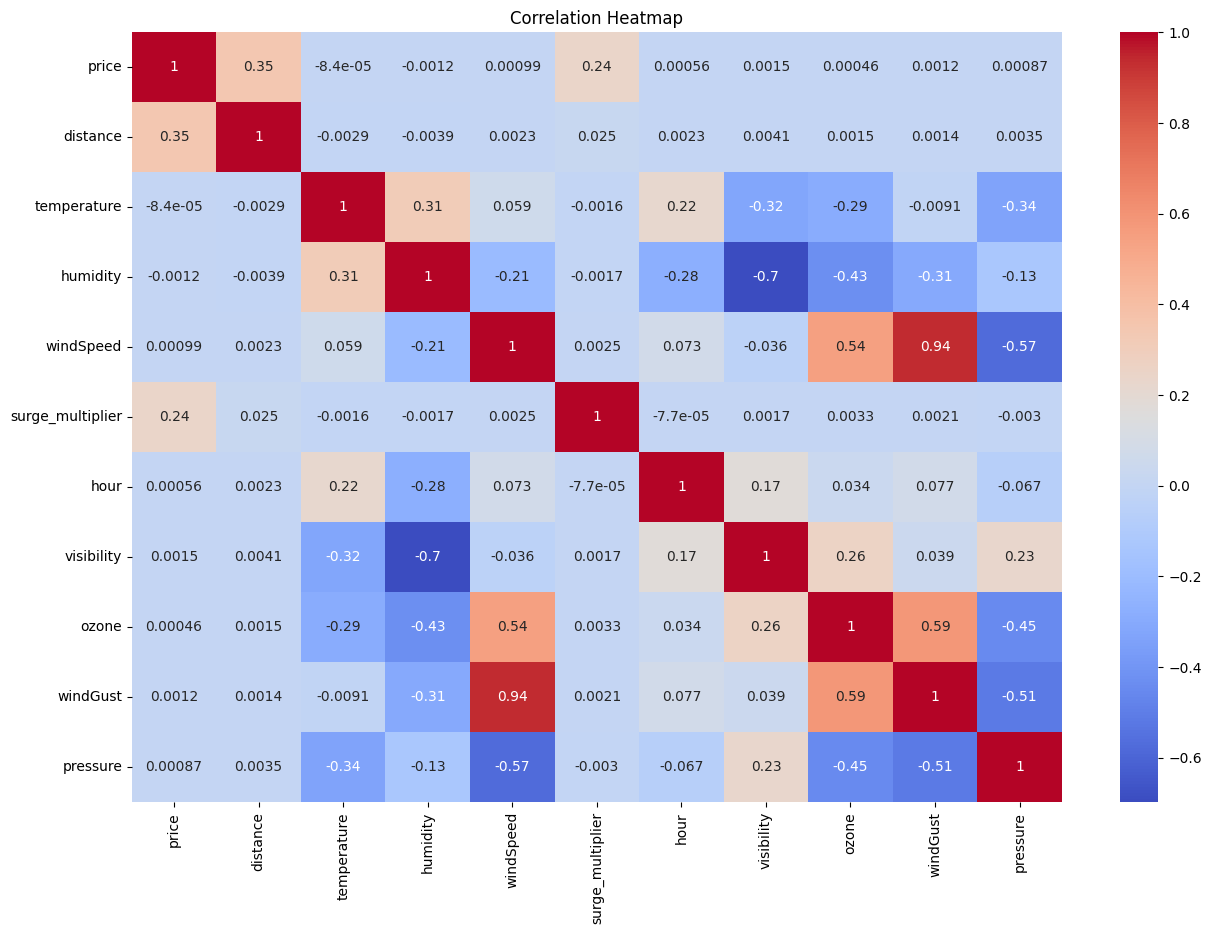

In [52]:
numerical_cols = ['price', 'distance', 'temperature', 'humidity', 'windSpeed','surge_multiplier','hour','visibility','ozone','windGust','pressure']
plt.figure(figsize=(15, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Terlihat bahwa Seluruh korelasi yang digunakan hampir semua tidak berhubungan tapi hanya ada beberapa yang memiliki korelasi namun lemah yaitu 
1. distance
2. surge_multiplier

hal ini akan digunakna sebagai variabel prediktif untuk variabel target kita yaitu **Price**

In [53]:
df_clear_new2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              637976 non-null  int64  
 1   day               637976 non-null  int64  
 2   month             637976 non-null  int64  
 3   source            637976 non-null  object 
 4   destination       637976 non-null  object 
 5   cab_type          637976 non-null  object 
 6   name              637976 non-null  object 
 7   price             637976 non-null  float64
 8   distance          637976 non-null  float64
 9   surge_multiplier  637976 non-null  float64
 10  short_summary     637976 non-null  object 
 11  long_summary      637976 non-null  object 
 12  icon              637976 non-null  object 
 13  visibility.1      637976 non-null  float64
dtypes: float64(4), int64(3), object(7)
memory usage: 73.0+ MB


##### 6.2.2.6 Menghapus kolom yang berelasi rendah

In [54]:
df_clear = df_clear_new2.drop(['hour','day','month',
                               'source', 'destination','long_summary',
                               'icon'],axis=1)
df_clear.head()

,cab_type,name,price,distance,surge_multiplier,short_summary,visibility.1
0,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,10.000
1,Lyft,Lux,11.0,0.44,1.0,Rain,4.786
2,Lyft,Lyft,7.0,0.44,1.0,Clear,10.000
3,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,10.000
4,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,10.000


##### 6.2.2.7 Rename kolom yang digunakan

In [55]:
# Mengganti nama kolom yang digunakan
df_clear.rename(columns={
    "cab_type": "transportation name", 
    "name": "transportation type", 
    "short_summary": "weather",
    "surge_multiplier": "surge multiplier",
    "visibility.1": "visibility"}, inplace=True)


In [56]:
df_clear.head()

,transportation name,transportation type,price,distance,surge multiplier,weather,visibility
0,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,10.000
1,Lyft,Lux,11.0,0.44,1.0,Rain,4.786
2,Lyft,Lyft,7.0,0.44,1.0,Clear,10.000
3,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,10.000
4,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,10.000


##### 6.2.2.8 Menghapus Outlier Price

In [57]:
Qp12 = df_clear['price'].quantile(0.25)
Qp32 = df_clear['price'].quantile(0.75)
IQRp = Qp32-Qp12

In [58]:
df_clear[df_clear['price']>(Qp32+(1.5*IQRp))]

,transportation name,transportation type,price,distance,surge multiplier,weather,visibility
706,Lyft,Lux Black,52.5,3.25,2.00,Partly Cloudy,9.899
707,Lyft,Lux Black XL,67.5,3.25,2.00,Partly Cloudy,9.827
769,Lyft,Lux Black XL,45.5,4.76,1.00,Partly Cloudy,9.962
1094,Lyft,Lux Black XL,45.5,4.31,1.00,Light Rain,2.030
1318,Lyft,Lux Black XL,45.5,5.33,1.00,Overcast,9.608
...,...,...,...,...,...,...,...
692439,Uber,Black SUV,47.0,5.56,1.00,Mostly Cloudy,9.808
692698,Lyft,Lux Black XL,52.5,4.58,1.25,Partly Cloudy,9.641
692891,Lyft,Lux Black XL,47.5,5.42,1.00,Foggy,1.460
692962,Uber,Black SUV,51.0,7.36,1.00,Mostly Cloudy,9.889


In [59]:
df_clear[df_clear['price']<(Qp12-(1.5*IQRp))]

,transportation name,transportation type,price,distance,surge multiplier,weather,visibility


In [60]:
print('Size dimention before removing :',df_clear.shape)
df_clear= df_clear[~((df_clear['price']>(Qp32+(1.5*IQRp))))]
print('Size dimention after removing :',df_clear.shape)

Size dimention before removing : (637976, 7)
Size dimention after removing : (632387, 7)


### G.7 Definition Model
-----


Setelah melakukan data cleaning dan data preprocessing, diperoleh dataframe baru yang akan digunakan di tahap selanjutnya. Terdapat 6 atribut yang akan digunakan untuk membuat model prediksi tarif, yaitu Layanan, Kendaraan, Awal, Tujuan, Jarak, dan Surge_multiplier.

Metode pengujian yang akan diimplementasikan pada project kali ini adalah metode Linear Regression, Random Forest, dan Decision Tree Regressor. 

Ada berbagai metrics untuk mengukur kinerja model regresi. Namun, pada project ini akan menggunakan metrik R-squares dan RMSE (Root-mean-square-error) untuk mengukur kinerja model.

### H.8. Modelling

In [61]:
#Melakukan encoding dengan Label Encoder pada atribut yang memiliki tipe data Object.
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


encoding_pipeline = Pipeline([
    ('encoding', MultiColumnLabelEncoder(columns =["transportation name","transportation type","price","distance","surge multiplier","weather","visibility"]))
])

#Membuat variabel df_rfe untuk menampung hasil encode
df_encode = encoding_pipeline.fit_transform(df_clear)
df_encode.head()

,transportation name,transportation type,price,distance,surge multiplier,weather,visibility
0,0,7,4,15,0,4,226
1,0,2,20,15,0,8,57
2,0,5,8,15,0,0,226
3,0,4,53,15,0,0,226
4,0,6,14,15,0,6,226


In [62]:
df_encode.columns

Index(['transportation name', 'transportation type', 'price', 'distance',
       'surge multiplier', 'weather', 'visibility'],
      dtype='object')

#### H.8.2 Train and Split Data

In [63]:
X = df_encode.drop(columns=['price'],axis=1).values
y = df_encode['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=350)

In [64]:
X.shape

(632387, 6)

In [65]:
y.shape

(632387,)

In [66]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [67]:
# Fit to data training
model_lr = lr.fit(X_train,y_train)
y_pred_lr=model_lr.predict(X_test)

In [68]:
# nilai intercept
print(("nilai intercept:"),model_lr.intercept_)

# nilai koefisien
print(("nilai koefisien:"),lr.coef_)

nilai intercept: 36.75502387251289
nilai koefisien: [ 5.34294365e+00 -3.67961587e+00  6.10861322e-02  7.27494170e+00
  6.51723909e-03 -1.96173706e-04]


In [69]:
lr_mse = mean_squared_error(y_test,y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
print('Linear Regression MSE: %.4f' % lr_mse)
print('Linear Regression RMSE: %.4f' % lr_rmse)

Linear Regression MSE: 197.1480
Linear Regression RMSE: 14.0409


#### H.8.3 Linear Regression

In [70]:
r2_lr_train = model_lr.score(X_train, y_train)
r2_lr_test = model_lr.score(X_test, y_test)
# Melihat nilai r-square dari nilai testing dan training
print(("Nilai R-squared Training Linear Regression:"),r2_lr_train)
print(("Nilai R-squared Testing Linear Regression:"),r2_lr_test)


Nilai R-squared Training Linear Regression: 0.5083039792551709
Nilai R-squared Testing Linear Regression: 0.5084783823738425


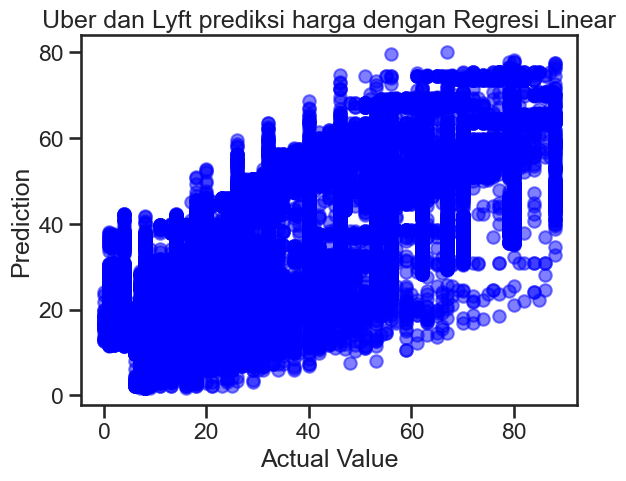

In [71]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()

ax.scatter(y_test, y_pred_lr, alpha=.5, color='blue')

ax.set(xlabel='Actual Value', 
       ylabel='Prediction',
       title='Uber dan Lyft prediksi harga dengan Regresi Linear');

* Kesimpulan:
  
  Berdasarkan visualisasi scatter plot di aras terlihat perbedaan dari actual value terhadap prediction membentuk pola garis lurus dari kiri bawah naik ke kanan atas mengindikasikan kedua data train dan test berelasi positif.

### I.9. Model Evaluation
-----

In [72]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True],
                'copy_X':[True],
                'n_jobs':[1000]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score
0,linear_regression,0.509159


In [73]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

import warnings
warnings.filterwarnings('ignore')

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,lasso,0.482522,"{'alpha': 1, 'selection': 'cyclic'}"
1,decision_tree,0.940814,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


##### 9.1.1 Load Model Evaluation With Decision Tree Regressor

In [74]:
# Membuat model Decision Tree
model_eval2 = DecisionTreeRegressor(criterion= 'friedman_mse', splitter= 'best')

In [75]:
# Train model menggunakan training set
dtc_model = model_eval2.fit(X_train, y_train)
predictions_dtc = dtc_model.predict(X_test)
dtc_train_r2 = model_eval2.score(X_train,y_train)
dtc_test_r2 = model_eval2.score(X_test, y_test)
print('Decision Tree train R squared : %.4f' % dtc_train_r2)
print('Decision Tree test R squared": %.4f' % dtc_test_r2)

Decision Tree train R squared : 0.9845
Decision Tree test R squared": 0.9413


In [76]:
dtc_mse = mean_squared_error(predictions_dtc, y_test)
dtc_rmse = np.sqrt(dtc_mse)
print('Decision Tree Regressor MSE: %.4f' % dtc_mse)
print('Decision Tree Regressor RMSE: %.4f' % dtc_rmse)

Decision Tree Regressor MSE: 23.5461
Decision Tree Regressor RMSE: 4.8524


##### 9.1.2 Load Model Evaluation With Random Forest Regressor

In [77]:
# Membuat model pengujian random forest 
model_eval3 = RandomForestRegressor(n_estimators = 60, random_state = 15)

In [78]:
model_rfr = model_eval3.fit(X_train,y_train)

In [79]:
y_predict_rfr = model_rfr.predict(X_test)
r2_rfr_train = model_eval3.score(X_train, y_train)
r2_rfr_test = model_eval3.score(X_test, y_test)

##Menentukan nilai r-square pada nilai testing dan training
print(("Nilai R-squared Training Random Forest:"),r2_rfr_train)
print(("Nilai R-squared Testing Random Forest:"),r2_rfr_test)

Nilai R-squared Training Random Forest: 0.9819100656550259
Nilai R-squared Testing Random Forest: 0.9553873847508146


### J.9. Model Inference
-----

In [80]:
df_encode.head()

,transportation name,transportation type,price,distance,surge multiplier,weather,visibility
0,0,7,4,15,0,4,226
1,0,2,20,15,0,8,57
2,0,5,8,15,0,0,226
3,0,4,53,15,0,0,226
4,0,6,14,15,0,6,226


In [81]:
explore = {'transportation name': [0, 1, 2, 3], 'transportation type': [0, 1, 2, 3], 'distance': [10, 15, 20, 30], 'surge multiplier': [0, 1, 2, 3], 'weather': [0, 1.25, 2, 3], 'distance': [0, 1, 2, 3],
        'visibility': [100, 200, 300, 400]}
explore = pd.DataFrame(explore)

In [82]:
price_predict_lr= model_lr.predict(explore)
print('Prediksi Harga Transportasi Online Dengan Linear Regression: ')
print(price_predict_lr)

Prediksi Harga Transportasi Online Dengan Linear Regression: 
[36.7354065  45.72329129 54.70791745 63.69417292]


In [83]:
price_predict_dtr = dtc_model.predict(explore)
print('Prediksi Harga Transportasi Online Dengan Decision Tree: ')
print(price_predict_dtr)

Prediksi Harga Transportasi Online Dengan Decision Tree: 
[18. 56. 56. 56.]


### K.10. Conclusion
-----

In [84]:
print(("Nilai R-squared Training Linear Regression:"),r2_lr_train)
print(("Nilai R-squared Testing Linear Regression:"),r2_lr_test)
print('Decision Tree train R squared : %.4f' % dtc_train_r2)
print('Decision Tree test R squared": %.4f' % dtc_test_r2)

Nilai R-squared Training Linear Regression: 0.5083039792551709
Nilai R-squared Testing Linear Regression: 0.5084783823738425
Decision Tree train R squared : 0.9845
Decision Tree test R squared": 0.9413


1. Data masih terdapat banyak outlier dan untuk perbandingan distribusi harga penjualan, jelas bahwa lyft memiliki median paling tinggi
2. Analisis distribusi jam operasional pada dataset "Uber vs Lyft" memberikan gambaran tentang sebaran perjalanan dalam sehari berdasarkan jamnya. Ini dapat memberikan wawasan mengenai pola permintaan pengguna pada berbagai jam dalam sehari. melalui visualisasi ini kita dapat melihat pola permintaan penggunaan pada jam jam tertentu. seperti contohnya banyak yang memesan pada pukul 00.00
3. Lebih banyak yang menggunakan Uber pada destinasi financial district dibandingkan Lyft
4. Rata-rata harga perjalanan berkisar antara 16.50 hingga 16.60, dengan variasi yang relatif kecil antara jam-jam tertentu.
5.  Korelasi cukup lemah perlu ditambahkan data kategorikal
6.  Untuk model lebih baik menggunakan model linear regresion yang model2, dimana model ini menghasilkan R-squared sebesar 48, dan error sebesar 42 adalah model yang memiliki fitur tambahan yaitu cab_type dan name yang telah di lakukan encoding
7. untuk lebih bagus lagi menggunakan random forest dikarenakan hasil r-squared nya adalah 94 sedangkan MSEnya hanya 4 yang mana errornya cukup kecil